# Data Processing Pipeline Tests

In [1]:
import pandas as pd

import glob

queries = []
for file in glob.glob("../data/processed/training_alerts_v2/TDE/*"):
    q = pd.read_pickle(file)
    queries.append(q)

In [2]:
queries

[           SNID          RA        DEC  HOSTGAL_PHOTOZ  HOSTGAL_PHOTOZ_ERR  \
 0      36556923  245.695338   2.340424        0.222472             0.03314   
 1      36556923  245.695338   2.340424        0.222472             0.03314   
 2      36556923  245.695338   2.340424        0.222472             0.03314   
 3       9509859  349.620232 -39.603846        0.623790             0.04433   
 4      72749777   74.854771  -6.687188        0.895500             0.05098   
 ...         ...         ...        ...             ...                 ...   
 25221  23343882  129.963759 -14.663037        1.047848             0.05483   
 25222  23343882  129.963759 -14.663037        1.047848             0.05483   
 25223  23343882  129.963759 -14.663037        1.047848             0.05483   
 25224  23343882  129.963759 -14.663037        1.047848             0.05483   
 25225  29151037    6.365489 -32.660228        0.123249             0.03044   
 
        HOSTGAL_RA  HOSTGAL_DEC     MWEBV  MWEBV_E

In [7]:
pdf = pd.concat(queries)
pdf

,SNID,RA,DEC,HOSTGAL_PHOTOZ,HOSTGAL_PHOTOZ_ERR,HOSTGAL_RA,HOSTGAL_DEC,MWEBV,MWEBV_ERR,REDSHIFT_HELIO,REDSHIFT_HELIO_ERR,MJD,FLUXCAL,FLUXCALERR,PHOTFLAG,BAND,candid,type
0,36556923,245.695338,2.340424,0.222472,0.03314,245.695265,2.340021,0.070417,0.003521,0.222472,0.03314,[60383.3895],[56.013527],[5.377808],[6144],[r ],26086950,TDE
1,36556923,245.695338,2.340424,0.222472,0.03314,245.695265,2.340021,0.070417,0.003521,0.222472,0.03314,"[60383.3895, 60383.3959, 60385.3903]","[56.013527, 38.974525, 42.328526]","[5.377808, 8.177181, 5.161151]","[6144, 0, 4096]","[r , i , r ]",26086951,TDE
2,36556923,245.695338,2.340424,0.222472,0.03314,245.695265,2.340021,0.070417,0.003521,0.222472,0.03314,"[60383.3895, 60383.3959, 60385.3903, 60386.408...","[56.013527, 38.974525, 42.328526, 29.691849, 2...","[5.377808, 8.177181, 5.161151, 14.833973, 4.73...","[6144, 0, 4096, 0, 4096]","[r , i , r , z , i ]",26086952,TDE
3,9509859,349.620232,-39.603846,0.623790,0.04433,349.620151,-39.604005,0.016827,0.000841,0.623790,0.04433,[60932.1077],[13.799493],[3.0356932],[6144],[g ],26086953,TDE
4,72749777,74.854771,-6.687188,0.895500,0.05098,74.854755,-6.687221,0.047606,0.002380,0.895500,0.05098,[60323.0953],[13.127023],[2.3917122],[6144],[g ],26086954,TDE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25406,65120329,297.192147,-51.289364,0.969446,0.05340,297.192174,-51.289558,0.038386,0.001919,0.969446,0.05340,[60861.3007],[13.4625025],[2.6223202],[6144],[g ],25265694,TDE
25407,71534554,354.868776,-17.318923,0.605665,0.04332,354.868353,-17.318229,0.021777,0.001089,0.605665,0.04332,[60279.0367],[19.484705],[4.5135775],[6144],[r ],25265695,TDE
25408,43001665,307.276405,-16.706317,0.933845,0.05124,307.276469,-16.706400,0.063826,0.003191,0.933845,0.05124,[60499.3108],[20.41063],[3.7313938],[6144],[g ],25265696,TDE
25409,43001665,307.276405,-16.706317,0.933845,0.05124,307.276469,-16.706400,0.063826,0.003191,0.933845,0.05124,"[60483.3092, 60483.326, 60490.2734, 60490.2928...","[26.241688, 66.918396, 21.487047, 4.6843224, 4...","[28.000504, 33.354237, 9.731614, 10.436855, 27...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 614...","[z , Y , i , z , Y , i , z , Y , r , i , g , r...",25265697,TDE


In [8]:
pdf.rename(
    {
        "HOSTGAL_PHOTOZ": "hostgal_photoz",
        "HOSTGAL_PHOTOZ_ERR": "hostgal_photoz_err",
        "FLUXCAL": "flux",
        "FLUXCALERR": "flux_error",
        "MJD": "mjd",
        "candid": "object_id",
        "type": "target",
        "BAND": "passband",
    },
    axis="columns",
    inplace=True,
)

df = pdf.filter(
    items=[
        "mjd",
        "flux",
        "flux_error",
        "hostgal_photoz",
        "hostgal_photoz_err",
        "passband",
        "object_id",
        "target",
    ]
)
df

,mjd,flux,flux_error,hostgal_photoz,hostgal_photoz_err,passband,object_id,target
0,[60383.3895],[56.013527],[5.377808],0.222472,0.03314,[r ],26086950,TDE
1,"[60383.3895, 60383.3959, 60385.3903]","[56.013527, 38.974525, 42.328526]","[5.377808, 8.177181, 5.161151]",0.222472,0.03314,"[r , i , r ]",26086951,TDE
2,"[60383.3895, 60383.3959, 60385.3903, 60386.408...","[56.013527, 38.974525, 42.328526, 29.691849, 2...","[5.377808, 8.177181, 5.161151, 14.833973, 4.73...",0.222472,0.03314,"[r , i , r , z , i ]",26086952,TDE
3,[60932.1077],[13.799493],[3.0356932],0.623790,0.04433,[g ],26086953,TDE
4,[60323.0953],[13.127023],[2.3917122],0.895500,0.05098,[g ],26086954,TDE
...,...,...,...,...,...,...,...,...
25406,[60861.3007],[13.4625025],[2.6223202],0.969446,0.05340,[g ],25265694,TDE
25407,[60279.0367],[19.484705],[4.5135775],0.605665,0.04332,[r ],25265695,TDE
25408,[60499.3108],[20.41063],[3.7313938],0.933845,0.05124,[g ],25265696,TDE
25409,"[60483.3092, 60483.326, 60490.2734, 60490.2928...","[26.241688, 66.918396, 21.487047, 4.6843224, 4...","[28.000504, 33.354237, 9.731614, 10.436855, 27...",0.933845,0.05124,"[z , Y , i , z , Y , i , z , Y , r , i , g , r...",25265697,TDE


In [9]:
df = df.explode(["passband", "flux", "flux_error", "mjd"])
df

,mjd,flux,flux_error,hostgal_photoz,hostgal_photoz_err,passband,object_id,target
0,60383.3895,56.013527,5.377808,0.222472,0.03314,r,26086950,TDE
1,60383.3895,56.013527,5.377808,0.222472,0.03314,r,26086951,TDE
1,60383.3959,38.974525,8.177181,0.222472,0.03314,i,26086951,TDE
1,60385.3903,42.328526,5.161151,0.222472,0.03314,r,26086951,TDE
2,60383.3895,56.013527,5.377808,0.222472,0.03314,r,26086952,TDE
...,...,...,...,...,...,...,...,...
25410,60549.0887,14.773247,3.887888,0.933845,0.05124,i,25265698,TDE
25410,60549.1184,0.896479,8.879917,0.933845,0.05124,z,25265698,TDE
25410,60553.061,18.200577,4.914347,0.933845,0.05124,r,25265698,TDE
25410,60553.078,17.061981,7.092312,0.933845,0.05124,u,25265698,TDE


In [7]:
import astronet

from astronet.preprocess import (
    __filter_dataframe_only_supernova,
    __transient_trim,
    generate_gp_all_objects,
    one_hot_encode,
    remap_filters,
    robust_scale,
    predict_2d_gp,
    fit_2d_gp,
)

In [8]:
pdf.rename(
        {"SIM_Z": "hostgal_photoz", "FLUXCAL": "flux", "FLUXCALERR": "flux_error", "MJD": "mjd", "candid": "object_id", "type": "target", "BAND": "passband"},
    axis="columns", inplace=True
)  # snmachine and PLAsTiCC uses a different denomination


In [34]:
df = pdf.filter(
    items=[
    "mjd",
    "flux",
    "flux_error",
    "hostgal_photoz",
    "hostgal_photoz_err",
    "passband",
    "object_id",
    "target",
    ]
)

In [35]:
ELASTICC_FILTER_MAP = {
    "u": "lsstu",
    "g": "lsstg",
    "r": "lsstr",
    "i": "lssti",
    "z": "lsstz",
    "Y": "lssty",
}

# Central passbands wavelengths
ELASTICC_PB_WAVELENGTHS = {
    "lsstu": 3685.0,
    "lsstg": 4802.0,
    "lsstr": 6231.0,
    "lssti": 7542.0,
    "lsstz": 8690.0,
    "lssty": 9736.0,
}

ELASTICC_PB_COLORS = {
    "lsstu": "#984ea3",  # Purple: https://www.color-hex.com/color/984ea3
    "lsstg": "#4daf4a",  # Green: https://www.color-hex.com/color/4daf4a
    "lsstr": "#e41a1c",  # Red: https://www.color-hex.com/color/e41a1c
    "lssti": "#377eb8",  # Blue: https://www.color-hex.com/color/377eb8
    "lsstz": "#ff7f00",  # Orange: https://www.color-hex.com/color/ff7f00
    "lssty": "#e3c530",  # Yellow: https://www.color-hex.com/color/e3c530
}


In [36]:
df

,mjd,flux,flux_error,hostgal_photoz,passband,object_id,target
0,61287.2341,27.084452,2.857522,0.851393,g,32152815,TDE
1,61262.3531,24.935242,3.548370,0.851393,g,32152816,TDE
2,61287.2341,27.084452,2.857522,0.851393,g,32152816,TDE
3,61262.3700,18.187544,6.185833,0.851393,r,32152816,TDE
4,61287.2513,28.800117,3.306518,0.851393,r,32152816,TDE
...,...,...,...,...,...,...,...
22805031,61106.2230,47.988934,28.085463,0.233093,Y,32052759,TDE
22805032,61133.1960,60.923851,20.094168,0.233093,Y,32052759,TDE
22805033,61160.0577,41.361073,30.517502,0.233093,Y,32052759,TDE
22805034,61161.0964,-21.530848,33.843861,0.233093,Y,32052759,TDE


In [37]:
df = remap_filters(df, filter_map=ELASTICC_FILTER_MAP)

In [38]:
df

,mjd,flux,flux_error,hostgal_photoz,filter,object_id,target
0,61287.2341,27.084452,2.857522,0.851393,lsstg,32152815,TDE
1,61262.3531,24.935242,3.548370,0.851393,lsstg,32152816,TDE
2,61287.2341,27.084452,2.857522,0.851393,lsstg,32152816,TDE
3,61262.3700,18.187544,6.185833,0.851393,lsstr,32152816,TDE
4,61287.2513,28.800117,3.306518,0.851393,lsstr,32152816,TDE
...,...,...,...,...,...,...,...
22805031,61106.2230,47.988934,28.085463,0.233093,lssty,32052759,TDE
22805032,61133.1960,60.923851,20.094168,0.233093,lssty,32052759,TDE
22805033,61160.0577,41.361073,30.517502,0.233093,lssty,32052759,TDE
22805034,61161.0964,-21.530848,33.843861,0.233093,lssty,32052759,TDE


In [39]:
import numpy as np
filters = df["filter"]
filters = list(np.unique(filters))
filters

['lsstg', 'lssti', 'lsstr', 'lsstu', 'lssty', 'lsstz']

In [40]:
pb_wavelengths = ELASTICC_PB_WAVELENGTHS
pb_wavelengths

{'lsstu': 3685.0,
 'lsstg': 4802.0,
 'lsstr': 6231.0,
 'lssti': 7542.0,
 'lsstz': 8690.0,
 'lssty': 9736.0}

In [41]:
object_list = list(np.unique(df["object_id"]))
len(object_list)

997204

In [42]:
obs_transient = df
generated_gp_dataset = generate_gp_all_objects(
    object_list, obs_transient, timesteps=100, pb_wavelengths=ELASTICC_PB_WAVELENGTHS
)

COMPLETED OBJECT ID:31831435
COMPLETED OBJECT ID:31532860
COMPLETED OBJECT ID:31947486
SKIPPING OBJECT ID:31470390, ONLY 4 FILTER RECORDED
SKIPPING OBJECT ID:32086223, ONLY 5 FILTER RECORDED
COMPLETED OBJECT ID:32273462
COMPLETED OBJECT ID:31684599
SKIPPING OBJECT ID:31504756, ONLY 4 FILTER RECORDED
COMPLETED OBJECT ID:32257452
SKIPPING OBJECT ID:32158742, ONLY 5 FILTER RECORDED
SKIPPING OBJECT ID:31951082, ONLY 5 FILTER RECORDED
SKIPPING OBJECT ID:31963401, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:32243400, ONLY 5 FILTER RECORDED
COMPLETED OBJECT ID:32413088
COMPLETED OBJECT ID:31878596
COMPLETED OBJECT ID:32220480
COMPLETED OBJECT ID:31548172
SKIPPING OBJECT ID:31944418, ONLY 1 FILTER RECORDED
COMPLETED OBJECT ID:32376054
COMPLETED OBJECT ID:32292100
SKIPPING OBJECT ID:32143221, ONLY 1 FILTER RECORDED
SKIPPING OBJECT ID:31899262, ONLY 4 FILTER RECORDED
COMPLETED OBJECT ID:31695669
SKIPPING OBJECT ID:31914833, ONLY 4 FILTER RECORDED
SKIPPING OBJECT ID:31783468, ONLY 3 FILTER RECORDED

In [43]:
len(np.unique(generated_gp_dataset['object_id']))

53

In [44]:
generated_gp_dataset["object_id"] = generated_gp_dataset["object_id"].astype(int)

In [45]:
generated_gp_dataset

filter,mjd,lsstg,lssti,lsstr,lsstu,lssty,lsstz,object_id
0,60275.3535,13.041857,12.567481,12.993577,12.935982,10.930074,11.150694,31831435
1,60275.776065,13.497651,13.231905,13.557458,13.317075,11.501257,11.796999,31831435
2,60276.198629,13.960217,13.910273,14.131019,13.702593,12.082531,12.459617,31831435
3,60276.621194,14.4295,14.602204,14.714145,14.092426,12.673409,13.13731,31831435
4,60277.043759,14.905438,15.307261,15.306711,14.486458,13.273351,13.828843,31831435
...,...,...,...,...,...,...,...,...
5295,60707.758789,733.89871,395.804649,522.907727,985.459429,288.828537,334.1952,32048484
5296,60708.373667,740.948474,398.033488,526.660736,992.165922,292.803751,338.580249,32048484
5297,60708.988544,747.728628,400.41858,530.187572,998.239752,296.632638,342.754826,32048484
5298,60709.603422,754.226542,403.141825,533.573848,1003.714498,300.314166,346.717228,32048484


In [46]:
from astronet.viz.visualise_data import plot_event, plot_event_gp_mean

/Users/tallamjr/mambaforge/envs/elasticc/lib/python3.10/site-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


(<Figure size 1200x800 with 1 Axes>, <AxesSubplot:xlabel='mjd'>)

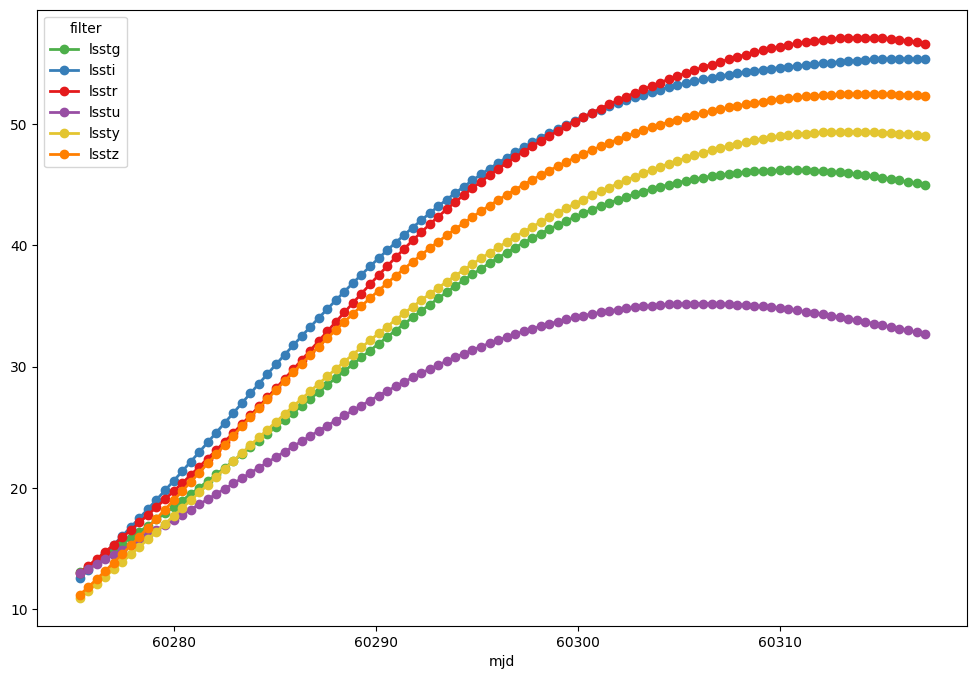

In [47]:
plot_event_gp_mean(generated_gp_dataset, object_id=generated_gp_dataset['object_id'][0], pb_colors=ELASTICC_PB_COLORS)

In [50]:
generated_gp_dataset['hostgal_pohotoz'] = df['hostgal_photoz']

filter,mjd,lsstg,lssti,lsstr,lsstu,lssty,lsstz,object_id
0,60275.3535,13.041857,12.567481,12.993577,12.935982,10.930074,11.150694,31831435
1,60275.776065,13.497651,13.231905,13.557458,13.317075,11.501257,11.796999,31831435
2,60276.198629,13.960217,13.910273,14.131019,13.702593,12.082531,12.459617,31831435
3,60276.621194,14.4295,14.602204,14.714145,14.092426,12.673409,13.13731,31831435
4,60277.043759,14.905438,15.307261,15.306711,14.486458,13.273351,13.828843,31831435
...,...,...,...,...,...,...,...,...
5295,60707.758789,733.89871,395.804649,522.907727,985.459429,288.828537,334.1952,32048484
5296,60708.373667,740.948474,398.033488,526.660736,992.165922,292.803751,338.580249,32048484
5297,60708.988544,747.728628,400.41858,530.187572,998.239752,296.632638,342.754826,32048484
5298,60709.603422,754.226542,403.141825,533.573848,1003.714498,300.314166,346.717228,32048484


In [80]:
ddf = df[['hostgal_photoz', 'object_id', 'target']]

In [81]:
dfwz = generated_gp_dataset.merge(ddf, on="object_id", how="left").drop_duplicates()

In [82]:
dfwz

,mjd,lsstg,lssti,lsstr,lsstu,lssty,lsstz,object_id,hostgal_photoz,target
0,60275.3535,13.041857,12.567481,12.993577,12.935982,10.930074,11.150694,31831435,0.671085,TDE
23,60275.776065,13.497651,13.231905,13.557458,13.317075,11.501257,11.796999,31831435,0.671085,TDE
46,60276.198629,13.960217,13.910273,14.131019,13.702593,12.082531,12.459617,31831435,0.671085,TDE
69,60276.621194,14.4295,14.602204,14.714145,14.092426,12.673409,13.13731,31831435,0.671085,TDE
92,60277.043759,14.905438,15.307261,15.306711,14.486458,13.273351,13.828843,31831435,0.671085,TDE
...,...,...,...,...,...,...,...,...,...,...
157645,60707.758789,733.89871,395.804649,522.907727,985.459429,288.828537,334.1952,32048484,0.125193,TDE
157676,60708.373667,740.948474,398.033488,526.660736,992.165922,292.803751,338.580249,32048484,0.125193,TDE
157707,60708.988544,747.728628,400.41858,530.187572,998.239752,296.632638,342.754826,32048484,0.125193,TDE
157738,60709.603422,754.226542,403.141825,533.573848,1003.714498,300.314166,346.717228,32048484,0.125193,TDE


/Users/tallamjr/mambaforge/envs/elasticc/lib/python3.10/site-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


(<Figure size 1200x800 with 1 Axes>, <AxesSubplot:xlabel='mjd'>)

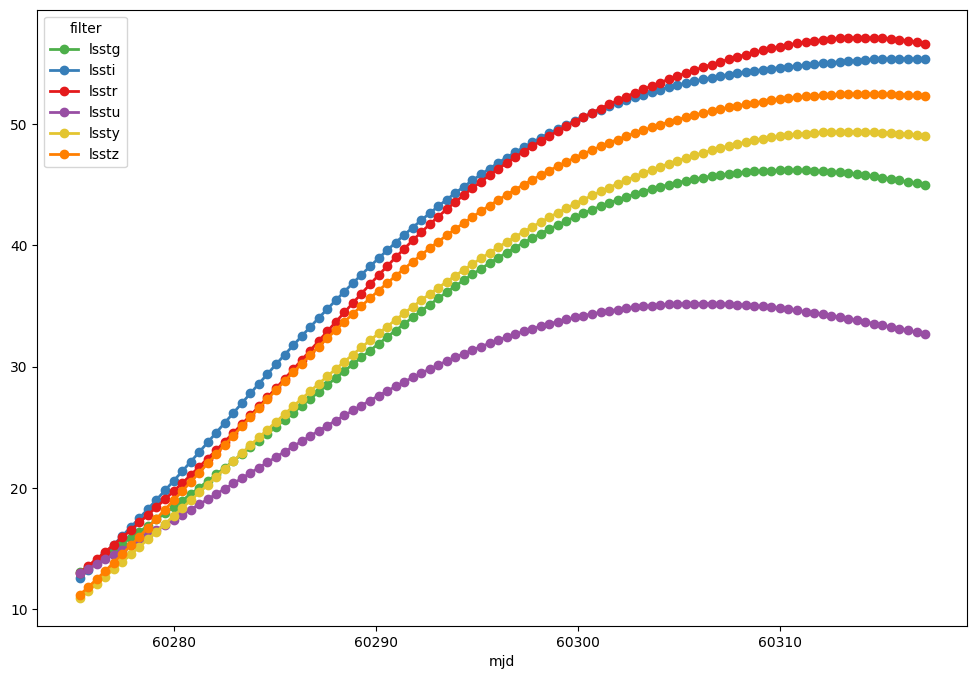

In [79]:
plot_event_gp_mean(generated_gp_dataset, object_id=dfwz['object_id'][0], pb_colors=ELASTICC_PB_COLORS)

In [10]:
import pandas as pd

In [11]:
df = pd.read_csv("../data/processed/t2/Mdwarf-flare.xz")

In [12]:
df

,Unnamed: 0,mjd,lsstg,lssti,lsstr,lsstu,lssty,lsstz,object_id,hostgal_photoz,target
0,0,61033.059500,11.037080,-40.265685,-8.701392,-3.213859,-14.477411,-43.437570,13622881,-9.0,Mdwarf-flare
1,456,61033.352682,12.416537,-39.502918,-7.750693,-0.981393,-12.100611,-42.466704,13622881,-9.0,Mdwarf-flare
2,912,61033.645864,13.662312,-38.581701,-6.805532,1.440326,-9.517240,-41.303991,13622881,-9.0,Mdwarf-flare
3,1368,61033.939045,14.813302,-37.485695,-5.862135,4.019760,-6.720877,-39.927636,13622881,-9.0,Mdwarf-flare
4,1824,61034.232227,15.901959,-36.199111,-4.916034,6.731453,-3.707492,-38.313381,13622881,-9.0,Mdwarf-flare
...,...,...,...,...,...,...,...,...,...,...,...
35295,12149710,61093.215428,20.897085,90.359249,6.136141,305.201331,86.376652,94.119596,13626178,-9.0,Mdwarf-flare
35296,12149848,61093.499121,24.308810,95.538568,7.103679,323.779079,91.246629,100.591025,13626178,-9.0,Mdwarf-flare
35297,12149986,61093.782814,28.452353,100.145367,8.335974,341.376941,95.986301,106.686722,13626178,-9.0,Mdwarf-flare
35298,12150124,61094.066507,33.490808,104.242944,9.860821,357.760398,100.581288,112.399845,13626178,-9.0,Mdwarf-flare


In [ ]:


queries = []
for file in glob.glob(f"../data/processed/training_alerts_v3/Mdwarf-flare/*"):
    q = pl.scan_csv(file)
    queries.append(q)

dataframes = pl.collect_all(queries)

pldf = pl.concat(dataframes)

pdf = pldf.to_pandas()

pdf.rename(
    {
        "HOSTGAL_PHOTOZ": "hostgal_photoz",
        "HOSTGAL_PHOTOZ_ERR": "hostgal_photoz_err",
        "FLUXCAL": "flux",
        "FLUXCALERR": "flux_error",
        "MJD": "mjd",
        "candid": "object_id",
        "type": "target",
        "BAND": "passband",
    },
    axis="columns",
    inplace=True,
)

df = pdf.filter(
    items=[
        "mjd",
        "flux",
        "flux_error",
        "hostgal_photoz",
        "hostgal_photoz_err",
        "passband",
        "object_id",
        "target",
    ]
)

df = remap_filters(df, filter_map=ELASTICC_FILTER_MAP)

object_list = list(np.unique(df["object_id"]))
print(f"NUM TOTAL ALERTS FOR {transient}: {len(object_list)}")

obs_transient = df
generated_gp_dataset = generate_gp_all_objects(
    object_list,
    obs_transient,
    timesteps=100,
    pb_wavelengths=ELASTICC_PB_WAVELENGTHS,
)
generated_gp_dataset["object_id"] = generated_gp_dataset["object_id"].astype(int)

print(
    f"NUM PROCESSED ALERTS FOR {transient}: {len(np.unique(generated_gp_dataset['object_id']))}"
)

ddf = df[["hostgal_photoz", "hostgal_photoz_err", "object_id", "target"]]

dfwz = generated_gp_dataset.merge(ddf, on="object_id", how="left").drop_duplicates()

dfwz.to_csv(f"../data/processed/t2/{transient}.xz", compression="infer")

plot_event_gp_mean(
    generated_gp_dataset,
    object_id=dfwz["object_id"][0],
    pb_colors=ELASTICC_PB_COLORS,
)
